In [3]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
magnetic_field = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

disp_x=0.12
#disp_x=0

arc=xt.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0)
                                        


Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [4]:
num_particles=1
#old
emittance=35*1e-6 #inital emittance
delta=1e-3

# #1_sigma
# emittance1=5*1e-6 #inital emittance
# delta1=5e-4

# #2_sigma
# emittance=emittance2
# delta=delta1


x_init=np.sqrt(beta_x*emittance)
y_init=np.sqrt(beta_y*emittance)

dtk_particle = xp.Particles(
        
        mass0=mass0,
        p0c=p0c,
        x=x_init,
        px=0,
        y=0,
        py=0,
        delta=0,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = xt.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         magnetic_field=magnetic_field,B_ratio=5e-4,
                                         Neutralisation_space_charge=0)

       


#num_turns=int(3*1e7)
num_turns=int(1*1e7)
step=100

# initialize arrays
x = []
px = []
delta =[]
action_x = []



for i in tqdm(range(num_turns)):
    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)
   
        # calculate action in horizontal plane
        action_x_temp = (dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
       
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
action_x = np.array(action_x)
delta = np.array(delta)



time = np.arange(0, num_turns, step) * s_per_turn



 37%|███▋      | 3706959/10000000 [02:47<04:43, 22174.68it/s]


KeyboardInterrupt: 

/tmp/pkruyt/ipykernel_39607/1635877437.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(time,delta/delta[0],label='delta')


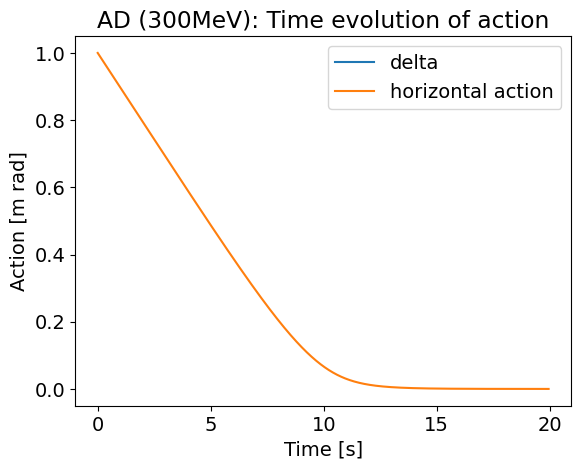

In [ ]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,delta/delta[0],label='delta')
plt.plot(time,action_x/action_x[0],label='horizontal action')
plt.xlabel('Time [s]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


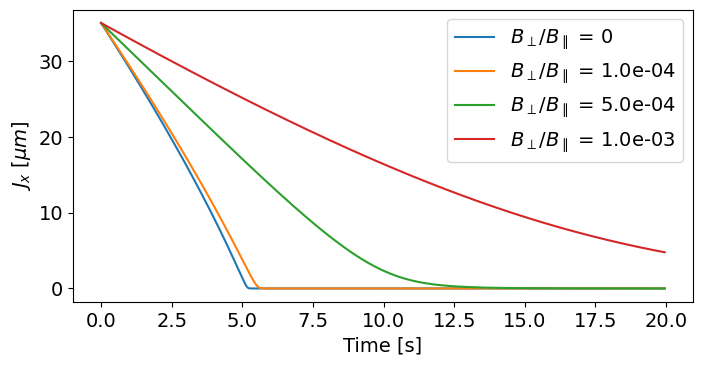

In [ ]:
#No space charge vary  sigma
# load the data
time = np.load('ipac/x+y(no_sc)/t.npy')

x0 = np.load("ipac/x(no_sc)/x_b_ratio=0.npy")
x3 = np.load("ipac/x(no_sc)/x_b_ratio=1e-3.npy")
x54 = np.load("ipac/x(no_sc)/x_b_ratio=5e-4.npy")
x4 = np.load("ipac/x(no_sc)/x_b_ratio=1e-4.npy")


plt.rcParams.update({'font.size': 14})  # set the default fontsize to 20

# plot the horizontal and vertical action vs time
plt.figure(figsize=(8, 4))

plt.plot(time,x0*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {}".format(0))

plt.plot(time,x4*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time,x54*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(5e-4))
plt.plot(time,x3*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))




plt.xlabel('Time [s]')
plt.ylabel('$J_x$ $[\mu m]$')
plt.legend()
#plt.title('Only x')


plt.ticklabel_format(useOffset=False,style='plain')
plt.subplots_adjust(bottom=0.15)
plt.savefig('test_figure.png', dpi=300)
plt.savefig('test_figure.eps', dpi=300)
